## Import modules

In [62]:
%load_ext autoreload
%autoreload 2
import pdb
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import KBinsDiscretizer


%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import nhanes as nhanes

## Loading dataset

In [64]:
DATA_PATH = './CDC/NHANES/'
DATASET = 'cancer'

### Note: 
The code below loads each dataset: dataset_features, dataset_targets

Here, all datasets are defined explicitly (see nhanes.py).

In [65]:
ds = nhanes.Dataset(DATA_PATH)
ds.load_cancer()
n_fe = ds.features.shape[1]
n_classes = 2

index = np.argwhere(ds.targets != 3)
dataset_features = ds.features[index.flatten()]
dataset_targets = ds.targets[index.flatten()]

Processing: HEPBD_F.XPT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Processing: VIQ.XPTPT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## Dataset overview

<IPython.core.display.Javascript object>


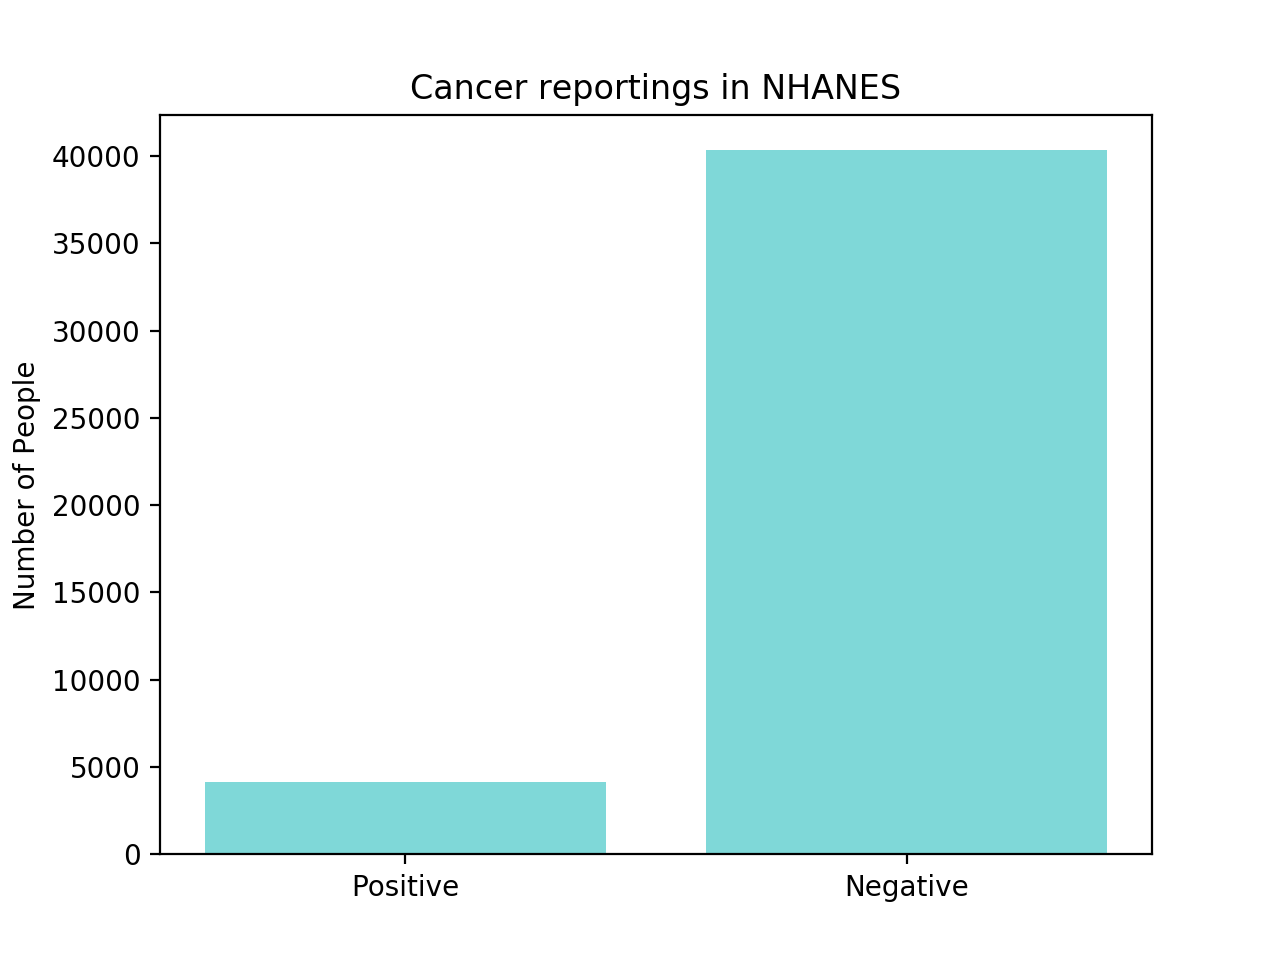

In [27]:
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
performance = [len(dataset_targets[dataset_targets==0]),len(dataset_targets[dataset_targets==1]) ]
plt.bar(y_pos, performance, color=(0, 0.7, 0.7, 0.6), align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of People')
plt.title('Cancer reportings in NHANES')
plt.show()

## Correlation Matrix

<IPython.core.display.Javascript object>


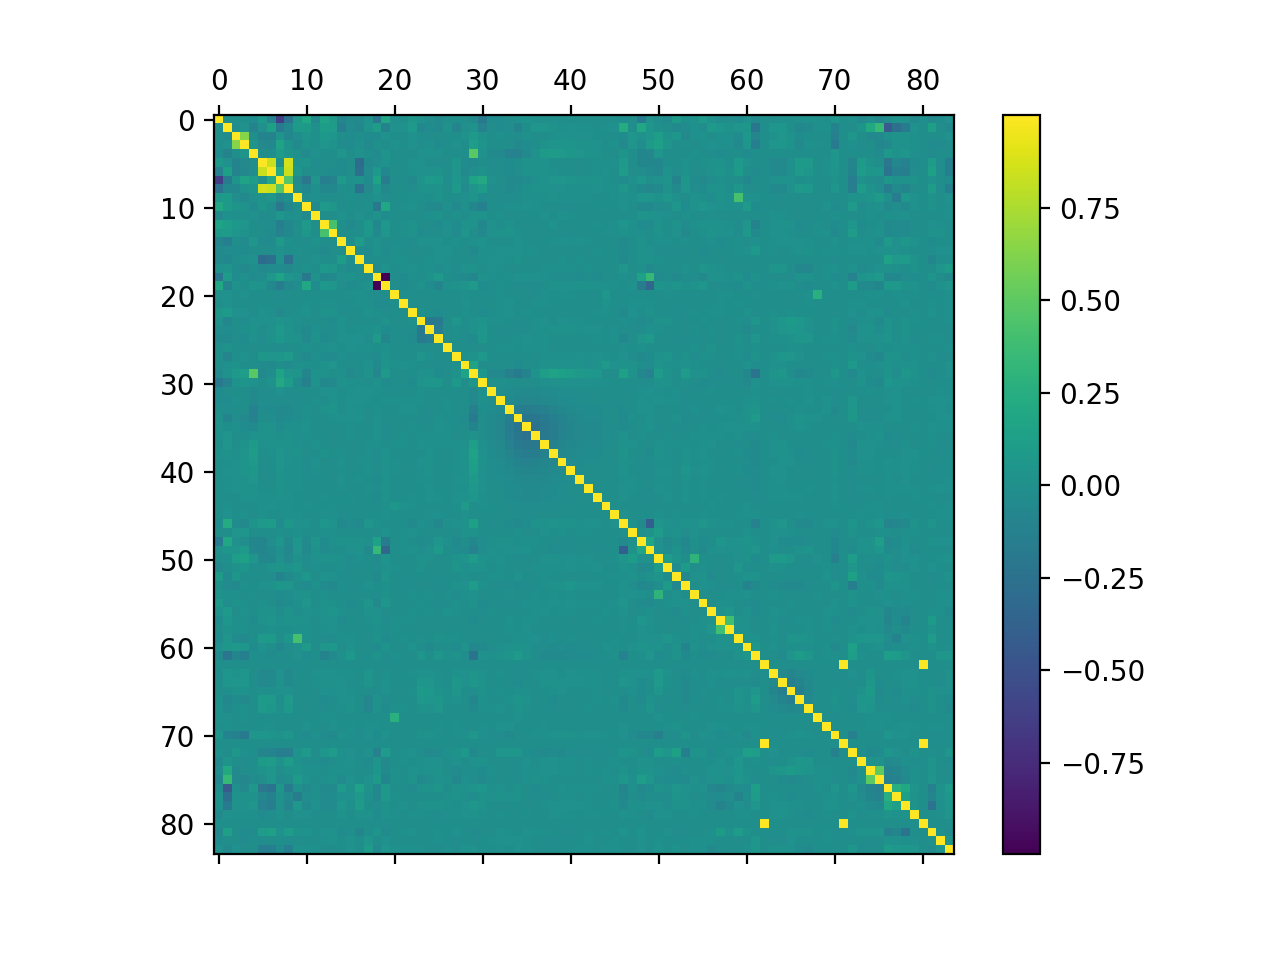

In [69]:
df = pd.DataFrame(dataset_features)
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
gr = ax.matshow(correlations)
fig.colorbar(gr)
plt.show()

## Mutual Information

In [67]:
mutual_info = mutual_info_classif(dataset_features, dataset_targets)
print(mutual_info)

[4.69512089e-03 4.15463154e-02 8.13787419e-03 1.39204889e-02
 1.57857446e-03 0.00000000e+00 0.00000000e+00 3.16692585e-03
 2.95159856e-03 1.68846839e-03 2.39186482e-03 2.66255356e-03
 5.88654891e-03 4.51187238e-03 7.37014644e-04 8.58901578e-04
 1.25440717e-04 1.08259600e-03 6.47579902e-03 4.72388886e-03
 0.00000000e+00 3.52264838e-03 2.66142962e-03 6.90049559e-04
 1.43153742e-03 1.32071842e-03 7.19410498e-04 4.10257492e-03
 4.02888164e-03 2.81295043e-03 1.25236251e-03 1.28446991e-05
 0.00000000e+00 0.00000000e+00 3.32815944e-03 1.71569097e-03
 2.81642322e-04 3.80246693e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.40046912e-04 1.21889680e-03 3.43653857e-04
 1.61569748e-03 1.18942627e-03 8.10845386e-03 6.22220399e-03
 6.01407594e-03 1.43105230e-03 3.89017524e-04 1.89372102e-03
 0.00000000e+00 2.33599210e-03 1.46046435e-03 2.95402189e-03
 0.00000000e+00 1.31222843e-03 3.76729811e-03 3.95516379e-03
 1.54701443e-02 7.64589397e-03 1.78262024e-03 0.00000000e+00
 9.37169597e-04 7.666469

## F test result

In [68]:
from sklearn.feature_selection import f_classif
f_test, _ = f_classif(dataset_features, dataset_targets)
print(f_test)

[ 3.41790432e-01  3.88785619e+03  2.06295080e+01  2.16759907e+01
  1.05152538e+01  2.95709878e+00  7.68519018e+01  7.73989261e+00
  7.00548622e+00  4.30306995e+00  1.08599315e+01  1.60805985e-01
  4.32057111e+01  3.30128513e-01  7.09156066e+01  1.74135571e+01
  1.17963315e+01  2.49973094e+01  2.11110927e+02  2.11060911e+02
  4.00144300e-01  2.85420901e-03  1.14738060e+01  8.81431872e+00
  1.31412903e-01  4.82774468e+00  1.10702256e+00  1.96654412e+01
  8.52246947e-01  7.95355363e+01  1.92473682e+01  4.15755241e-01
  1.34517829e+01  1.93780052e+01  8.28930745e+01  3.02015872e+00
  2.64744931e+01  2.71325609e+01  1.49934631e+01  8.99378699e+00
  7.31951558e+00  1.74666424e-01  2.37486508e-01  2.39929791e-03
  2.60090768e-01  1.18680606e-02  3.89963017e+02  5.05680173e-02
  6.02275291e+01  5.33897450e+00  6.23132769e+00  1.04881962e+01
  1.53012505e+01  1.10897113e+01  2.98529298e-02  4.24729826e+00
  8.97401399e+01  9.14143679e+00  1.25644446e+00  1.62269655e-01
  1.41560319e+00  4.35514

## Train/Test Separation

In [32]:
perm = np.random.permutation(dataset_targets.shape[0])
dataset_features = dataset_features[perm]
dataset_targets = dataset_targets[perm]

def get_batch(n_size, phase):
    # select indices
    n_samples = dataset_features.shape[0]
    n_classes = int(dataset_targets.max() + 1)
    if phase == 'test':
        inds_sel = np.arange(0, int(n_samples*0.15), 1)
    elif phase == 'validation':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.15), int(n_samples*0.30), 1)
    elif phase == 'train':
        n_samples = dataset_features.shape[0]
        inds_sel = np.arange(int(n_samples*0.30), n_samples, 1)
    else:
        raise NotImplementedError
    inds_sel = np.random.permutation(inds_sel)
    batch_inds = []
    for cl in range(n_classes):
        inds_cl = inds_sel[dataset_targets[inds_sel] == cl]
        batch_inds.extend(inds_cl[:n_size//n_classes])
    batch_inds = np.random.permutation(batch_inds)
    
    return dataset_features[batch_inds], dataset_targets[batch_inds]
    
features_bia, targets_bia = get_batch(n_size=4000, phase='train')
features_tst_bia, targets_tst_bia = get_batch(n_size=1000, phase='test')
features_unbia, features_tst_unbia, targets_unbia, targets_tst_unbia = train_test_split(dataset_features, dataset_targets,test_size=0.33, random_state=42)

## Classification on biased dataset

## Random Forest

In [98]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support
clf = RandomForestClassifier(n_estimators=100)
clf.fit(features_bia, targets_bia)
pred_tst_bia = clf.predict(features_tst_bia)
acc = np.mean(pred_tst_bia==targets_tst_bia)
print('acc_tst_RFC', acc)


from sklearn.metrics import classification_report
print(classification_report(targets_tst_bia, pred_tst_bia))

acc_tst_RFC 0.723
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       500
           1       0.74      0.70      0.72       500

   micro avg       0.72      0.72      0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



## ROC for RFC

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def roc_plotting(classifier, predicted_class, test_class):
    fpr,tpr,thresholds= roc_curve(test_class, predicted_class, drop_intermediate=False)# finding fpr and tpr
    roc_auc= auc(fpr,tpr)#graph based on AUC
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(classifier + " ROC")
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()



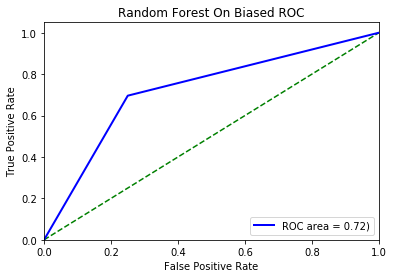

In [100]:
roc_plotting("Random Forest On Biased", pred_tst_bia, targets_tst_bia)

## Confusion Matrix for RFC

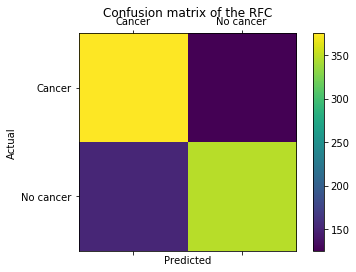

In [102]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
cm = confusion_matrix(targets_tst_bia,pred_tst_bia)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the RFC')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVC


In [103]:
clf = SVC(gamma='auto')
clf.fit(features_bia, targets_bia)
pred_tst_bia = clf.predict(features_tst_bia)
acc = np.mean(pred_tst_bia==targets_tst_bia)
print('acc_SVC', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_bia, pred_tst_bia))

acc_SVC 0.657
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       500
           1       0.69      0.56      0.62       500

   micro avg       0.66      0.66      0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.66      0.66      0.65      1000



## ROC for SVC

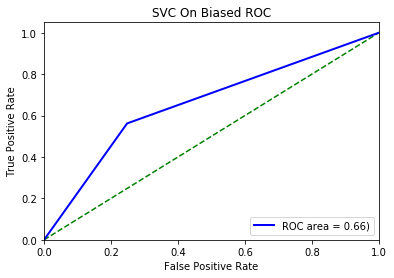

In [104]:
roc_plotting("SVC On Biased", pred_tst_bia, targets_tst_bia)

## Confusion Matrix for SVC

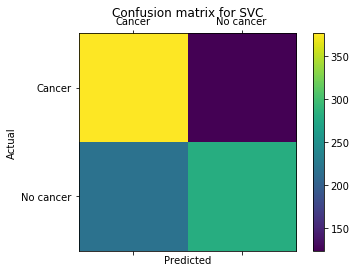

In [106]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
cm = confusion_matrix(targets_tst_bia,pred_tst_bia)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for SVC')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [86]:
clf = LogisticRegression(solver='lbfgs', max_iter=2000)
clf.fit(features_bia, targets_bia)
pred_tst_bia = clf.predict(features_tst_bia)
acc = np.mean(pred_tst_bia==targets_tst_bia)
print('acc_LR', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_bia, pred_tst_bia))

acc_LR 0.72
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       500
           1       0.75      0.66      0.70       500

   micro avg       0.72      0.72      0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



## ROC for Logistic Regression

<IPython.core.display.Javascript object>


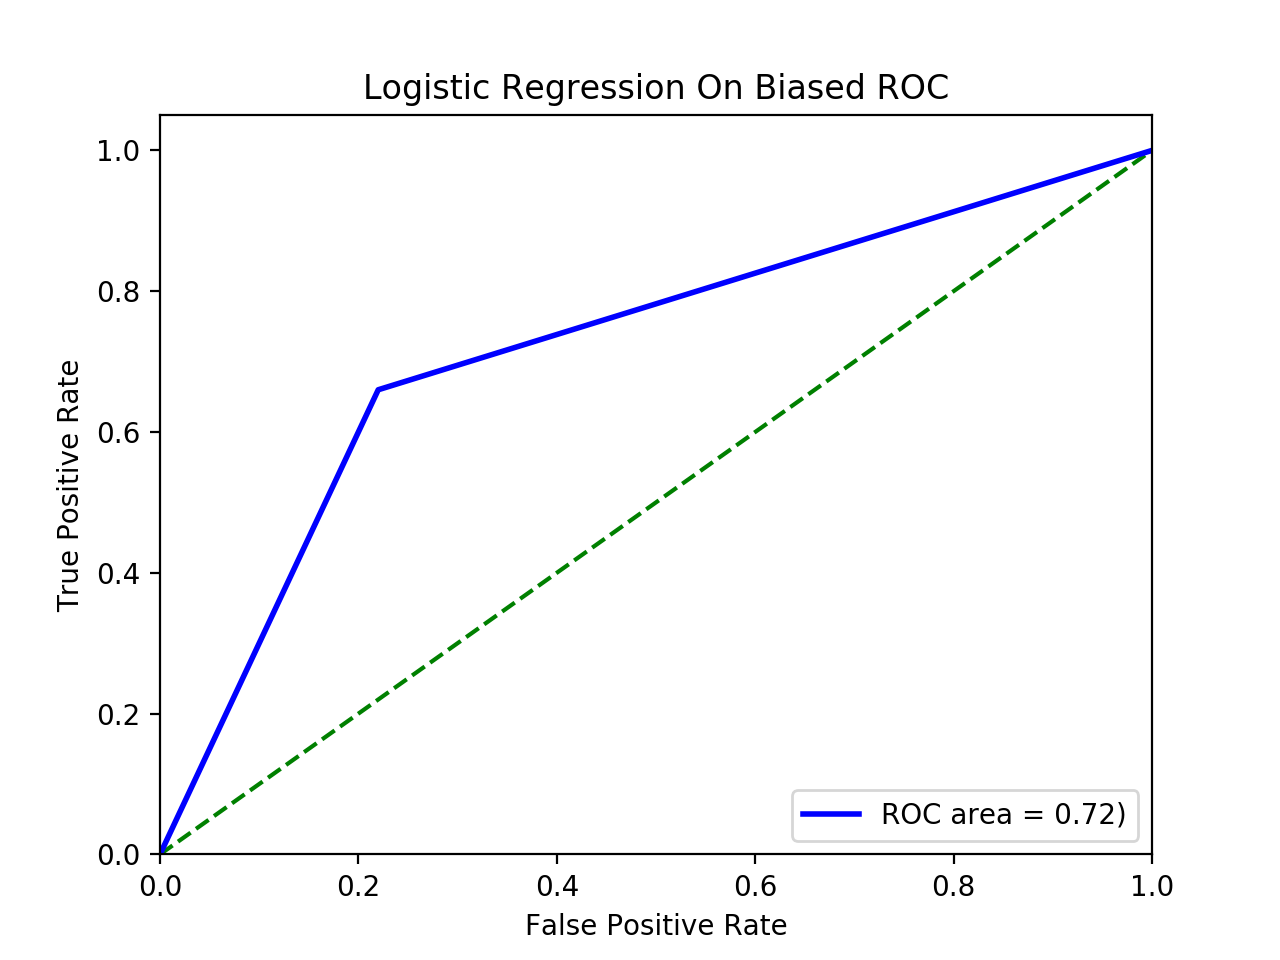

In [87]:
roc_plotting("Logistic Regression On Biased", pred_tst_bia, targets_tst_bia)

## Confusion Matrix for Logistic Regression

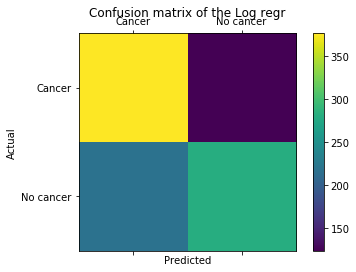

In [107]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
cm = confusion_matrix(targets_tst_bia,pred_tst_bia)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Log regr')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## K nearest neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(features_bia, targets_bia)
pred_tst_bia = neigh.predict(features_tst_bia)
acc = np.mean(pred_tst_bia==targets_tst_bia)
print('acc_KNN', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_bia, pred_tst_bia))

acc_KNN 0.606
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       500
           1       0.66      0.44      0.53       500

   micro avg       0.61      0.61      0.61      1000
   macro avg       0.62      0.61      0.60      1000
weighted avg       0.62      0.61      0.60      1000



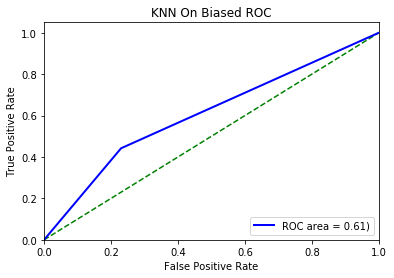

In [111]:
roc_plotting("KNN On Biased", pred_tst_bia, targets_tst_bia)

## Confusion Matrix for KNN

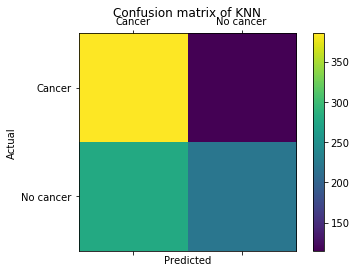

In [112]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
cm = confusion_matrix(targets_tst_bia,pred_tst_bia)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Means with SVD

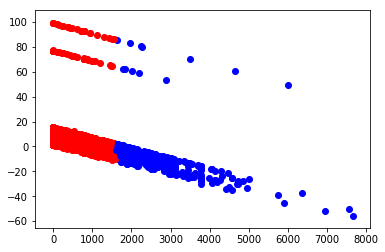

In [95]:
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

features_svd = TruncatedSVD(n_components=2).fit_transform(features_bia)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(features_svd)

kmeans_labels_=kmeans.labels_
for i in range(features_svd.shape[0]):
  if(kmeans_labels_[i] == 0):
    plt.scatter(features_svd[i,0], features_svd[i,1], c='r')
  else:
    plt.scatter(features_svd[i,0], features_svd[i,1], c='b')

## MLP Classifier

In [114]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(500,500,100,500,500), activation='tanh', solver='adam',
                 max_iter=5000,alpha=0.01,learning_rate_init=5e-7)
clf.fit(features_bia,targets_bia)
pred_tst=clf.predict(features_tst_bia)
# print(preds_tst)
pred_tst[pred_tst<0.5] = 0
pred_tst[pred_tst>=0.5] = 1
acc = np.mean(pred_tst==targets_tst_bia)
print('acc_Neural', acc)


from sklearn.metrics import classification_report
print(classification_report(targets_tst_bia, pred_tst_bia))

acc_Neural 0.687
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       500
           1       0.66      0.44      0.53       500

   micro avg       0.61      0.61      0.61      1000
   macro avg       0.62      0.61      0.60      1000
weighted avg       0.62      0.61      0.60      1000



## Classification on unbiased dataset

## Random Forest

In [115]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support
clf = RandomForestClassifier(n_estimators=100)
clf.fit(features_unbia, targets_unbia)
pred_tst_unbia = clf.predict(features_tst_unbia)
acc = np.mean(pred_tst_unbia==targets_tst_unbia)
print('acc_tst_RFC', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_unbia, pred_tst_unbia))


acc_tst_RFC 0.9074868860276586
              precision    recall  f1-score   support

           0       0.62      0.01      0.03      1366
           1       0.91      1.00      0.95     13313

   micro avg       0.91      0.91      0.91     14679
   macro avg       0.77      0.51      0.49     14679
weighted avg       0.88      0.91      0.87     14679



## ROC on Random Forest

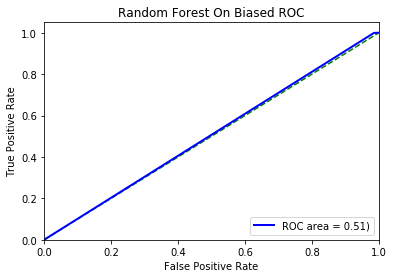

In [116]:
roc_plotting("Random Forest On Unbiased", pred_tst_unbia, targets_tst_unbia)

## Confusion Matrix for Random Forest


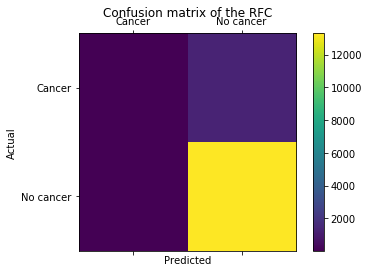

In [118]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
matrix = confusion_matrix(targets_tst_unbia,pred_tst_unbia)

fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(matrix)
plt.title('Confusion matrix of the RFC')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [121]:
clf = LogisticRegression(solver='lbfgs', max_iter=2000)
clf.fit(features_bia, targets_bia)
pred_tst_unbia = clf.predict(features_tst_unbia)
acc = np.mean(pred_tst_unbia==targets_tst_unbia)
print('acc_LR', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_unbia, pred_tst_unbia))

acc_LR 0.69330335853941
              precision    recall  f1-score   support

           0       0.20      0.76      0.32      1366
           1       0.97      0.69      0.80     13313

   micro avg       0.69      0.69      0.69     14679
   macro avg       0.58      0.72      0.56     14679
weighted avg       0.89      0.69      0.76     14679



## ROC for Logistic Regression

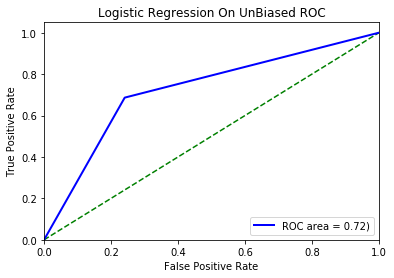

In [123]:
roc_plotting("Logistic Regression On UnBiased", pred_tst_unbia, targets_tst_unbia)

## Confusion Matrix for Log regr

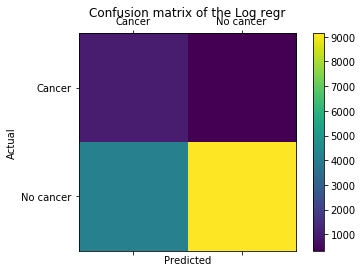

In [124]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
matrix = confusion_matrix(targets_tst_unbia,pred_tst_unbia)

fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(matrix)
plt.title('Confusion matrix of the Log regr')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Nearest Neighbours on unbiased dataset

In [132]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features_unbia, targets_unbia)
pred_tst_unbia = neigh.predict(features_tst_unbia)
acc = np.mean(pred_tst_unbia==targets_tst_unbia)
print('acc_KNN', acc)

from sklearn.metrics import classification_report
print(classification_report(targets_tst_unbia, pred_tst_unbia))

acc_KNN 0.8867089038762859
              precision    recall  f1-score   support

           0       0.21      0.08      0.11      1366
           1       0.91      0.97      0.94     13313

   micro avg       0.89      0.89      0.89     14679
   macro avg       0.56      0.52      0.53     14679
weighted avg       0.85      0.89      0.86     14679



## ROC for KNN

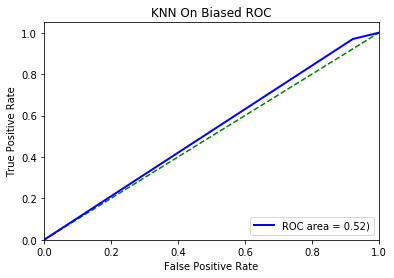

In [133]:
roc_plotting("KNN On Biased", pred_tst_unbia, targets_tst_unbia)

## Confusion Matrix for KNN

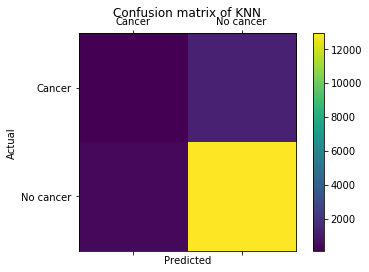

In [135]:
from sklearn.metrics import confusion_matrix
labels = ['Cancer', 'No cancer']
matrix = confusion_matrix(targets_tst_unbia,pred_tst_unbia)

fig = plt.figure()
ax = fig.add_subplot(111)
confusion = ax.matshow(matrix)
plt.title('Confusion matrix of KNN')
fig.colorbar(confusion)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K means with SVD


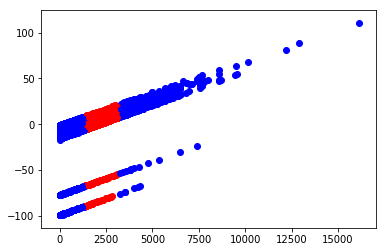

In [143]:
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

features_svd = TruncatedSVD(n_components=2).fit_transform(features_unbia)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(features_svd)

kmeans_labels_=kmeans.labels_
for i in range(features_svd.shape[0]):
  if(kmeans_labels_[i] == 0):
    plt.scatter(features_svd[i,0], features_svd[i,1], c='r')
  else:
    plt.scatter(features_svd[i,0], features_svd[i,1], c='b')

## MLP Classifier

In [138]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(500,500,100,500,500), activation='tanh', solver='adam',
                 max_iter=5000,alpha=0.01,learning_rate_init=5e-7)
clf.fit(features_unbia,targets_unbia)
pred_tst=clf.predict(features_tst_unbia)
# print(preds_tst)
pred_tst[pred_tst<0.5] = 0
pred_tst[pred_tst>=0.5] = 1
acc = np.mean(pred_tst==targets_tst_unbia)
print('acc_Neural', acc)


from sklearn.metrics import classification_report
print(classification_report(targets_tst_unbia, pred_tst_unbia))

acc_Neural 0.9064650180530008
              precision    recall  f1-score   support

           0       0.21      0.08      0.11      1366
           1       0.91      0.97      0.94     13313

   micro avg       0.89      0.89      0.89     14679
   macro avg       0.56      0.52      0.53     14679
weighted avg       0.85      0.89      0.86     14679

